<a href="https://colab.research.google.com/github/vkrisvasan/100days_OSL/blob/main/5_OSL_pandas_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#You have used 0 out of 100 requests in free tier
!pip install -qU pandasai pandas langchain langchain-groq -q

In [11]:
import os
import getpass
credential_names = ["PANDASAI_API_KEY","GROQ_API_KEY"]
for credential in credential_names:
  if credential not in os.environ:
    os.environ[credential]=getpass.getpass("Provide your..." + credential)

Provide your...GROQ_API_KEY··········


In [13]:
import os
from google.colab import userdata
from pandasai import SmartDataframe
from langchain_groq.chat_models import ChatGroq
from pandasai.llm import BambooLLM

os.environ['PANDASAI_API_KEY'] = os.getenv("PANDASAI_API_KEY")
llm = ChatGroq(model_name = 'llama3-70b-8192',api_key = os.environ['GROQ_API_KEY'])


#llm = BambooLLM()

In [15]:
import pandas as pd
import numpy as np

# Define the number of portfolios and tools
num_portfolios = 10
num_tools = 7

# Create the portfolio names
portfolios = [f"Portfolio {i}" for i in range(1, num_portfolios + 1)]

# Create the columns with sub-columns for each tool
columns = []
for tool_num in range(1, num_tools + 1):
    columns.append((f"Tool {tool_num}", "Critical"))
    columns.append((f"Tool {tool_num}", "High"))

# Generate random vulnerability data
data = np.random.randint(1, 16, size=(num_portfolios, len(columns)))

# Create a pandas DataFrame with MultiIndex columns
Critical_High_Vulnarability_byPortfolio_DF = pd.DataFrame(data, columns=pd.MultiIndex.from_tuples(columns), index=portfolios)

# Add portfolio names as a column
Critical_High_Vulnarability_byPortfolio_DF.index.name = "Portfolio"
Critical_High_Vulnarability_byPortfolio_DF.reset_index(inplace=True)

# Print the resulting DataFrame
print(Critical_High_Vulnarability_byPortfolio_DF)


      Portfolio   Tool 1        Tool 2        Tool 3        Tool 4       \
                Critical High Critical High Critical High Critical High   
0   Portfolio 1       12    5        4    6       14    9       13    6   
1   Portfolio 2        6    1       13   15        2    9       11    1   
2   Portfolio 3        6    6       13    8        9    3        1   14   
3   Portfolio 4        4    8       15    7       10    1       10   10   
4   Portfolio 5        6   10        2    5       12   12        6   11   
5   Portfolio 6       14    8        1    9       12   10       13    5   
6   Portfolio 7        5   15       10    6        7   15        8    9   
7   Portfolio 8        6    1       14    9        8   11       15    5   
8   Portfolio 9        1    4       10   14       11   13       13    1   
9  Portfolio 10        3   12       12    9       11    2        7    7   

    Tool 5        Tool 6        Tool 7       
  Critical High Critical High Critical High  
0      

In [16]:
#data = pd.read_csv('Dataset/water.csv')
Critical_High_Vulnarability_byPortfolio_DF.head()

Portfolio   Tool 1        Tool 2        Tool 3        Tool 4       \
               Critical High Critical High Critical High Critical High   
0  Portfolio 1       12    5        4    6       14    9       13    6   
1  Portfolio 2        6    1       13   15        2    9       11    1   
2  Portfolio 3        6    6       13    8        9    3        1   14   
3  Portfolio 4        4    8       15    7       10    1       10   10   
4  Portfolio 5        6   10        2    5       12   12        6   11   

    Tool 5        Tool 6        Tool 7       
  Critical High Critical High Critical High  
0       13   10       12    8       15    4  
1        7    3        1   14        2    7  
2       13   15        9    7        9    4  
3        8    3       10   11        2    8  
4        7    7        7   10        5    9

In [21]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Open the spreadsheet (create it if it doesn't exist)
try:
    sh = gc.open('My Sheet') # Replace 'My Sheet' with your desired sheet name
except gspread.exceptions.SpreadsheetNotFound:
    sh = gc.create('My Sheet') # Replace 'My Sheet' with your desired sheet name

# Select the first worksheet
worksheet = sh.sheet1

# Convert MultiIndex columns to single-level column names
Critical_High_Vulnarability_byPortfolio_DF.columns = ['_'.join(col) for col in Critical_High_Vulnarability_byPortfolio_DF.columns]

# Convert the DataFrame to a list of lists for writing to the sheet
data_for_sheet = [Critical_High_Vulnarability_byPortfolio_DF.columns.tolist()] + Critical_High_Vulnarability_byPortfolio_DF.values.tolist()

# Update the sheet with the data
worksheet.update('A1', data_for_sheet)

<ipython-input-21-353892a0525e>:26: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('A1', data_for_sheet)


{'spreadsheetId': '1zMCyozQ-oYl21K_n5Bi7P_Yx6caEm2-Ttno4Gw13nOE',
 'updatedRange': 'Sheet1!A1:O11',
 'updatedRows': 11,
 'updatedColumns': 15,
 'updatedCells': 165}

In [22]:
# Convert to SmartDataframe
sdf = SmartDataframe(Critical_High_Vulnarability_byPortfolio_DF, config={"llm": llm})

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'mean'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_exec

'/content/exports/charts/temp_chart.png'

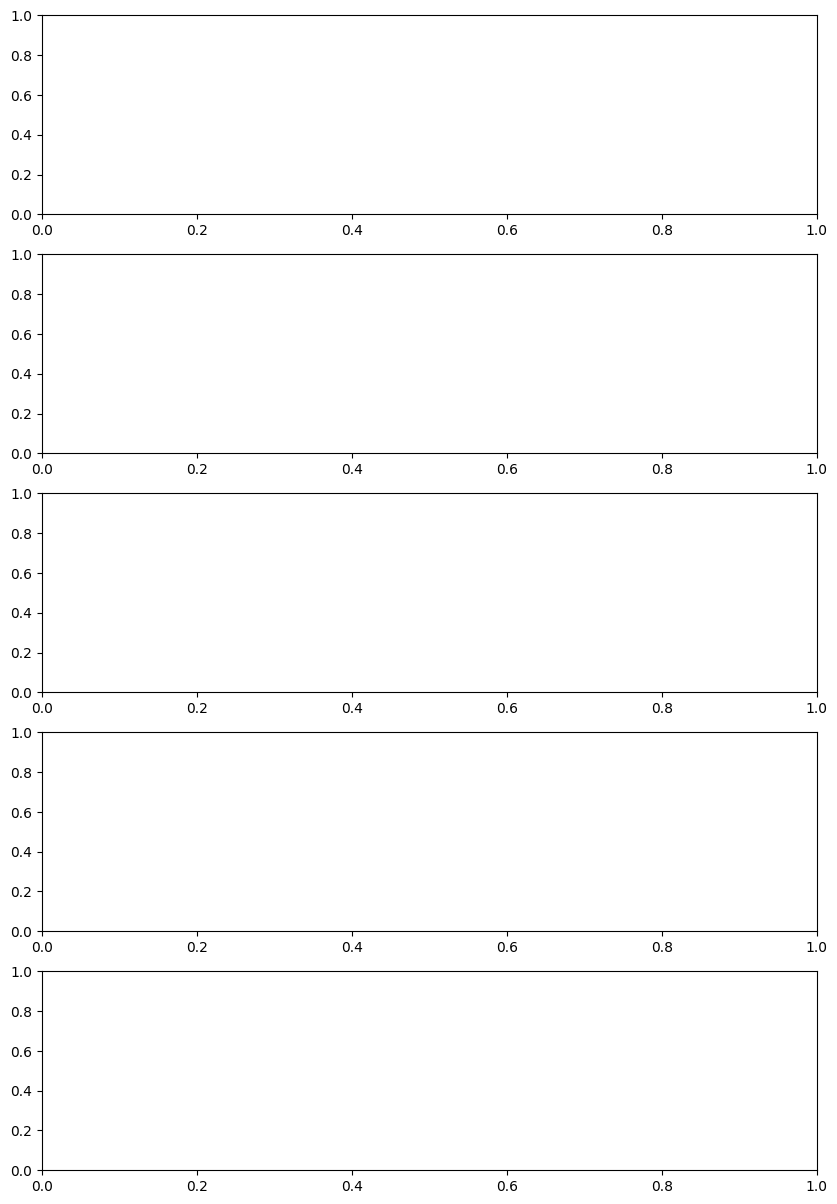

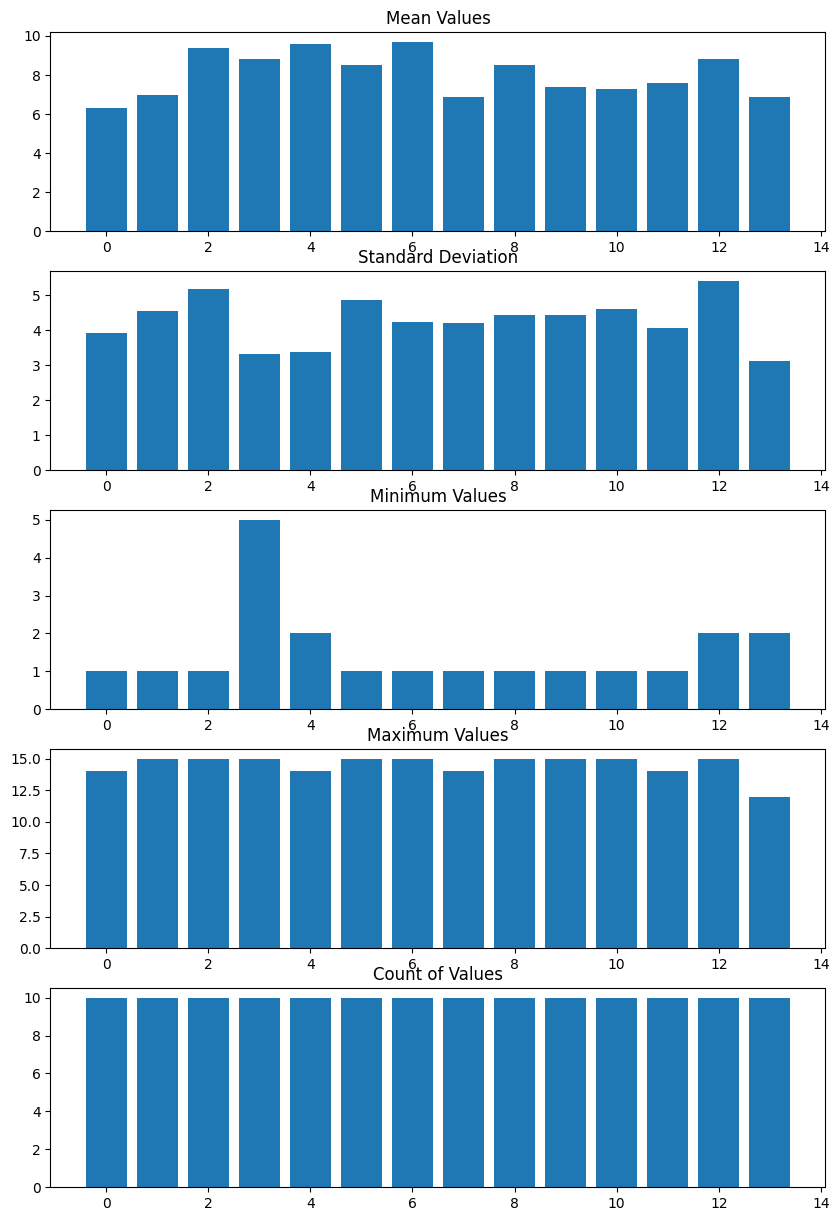

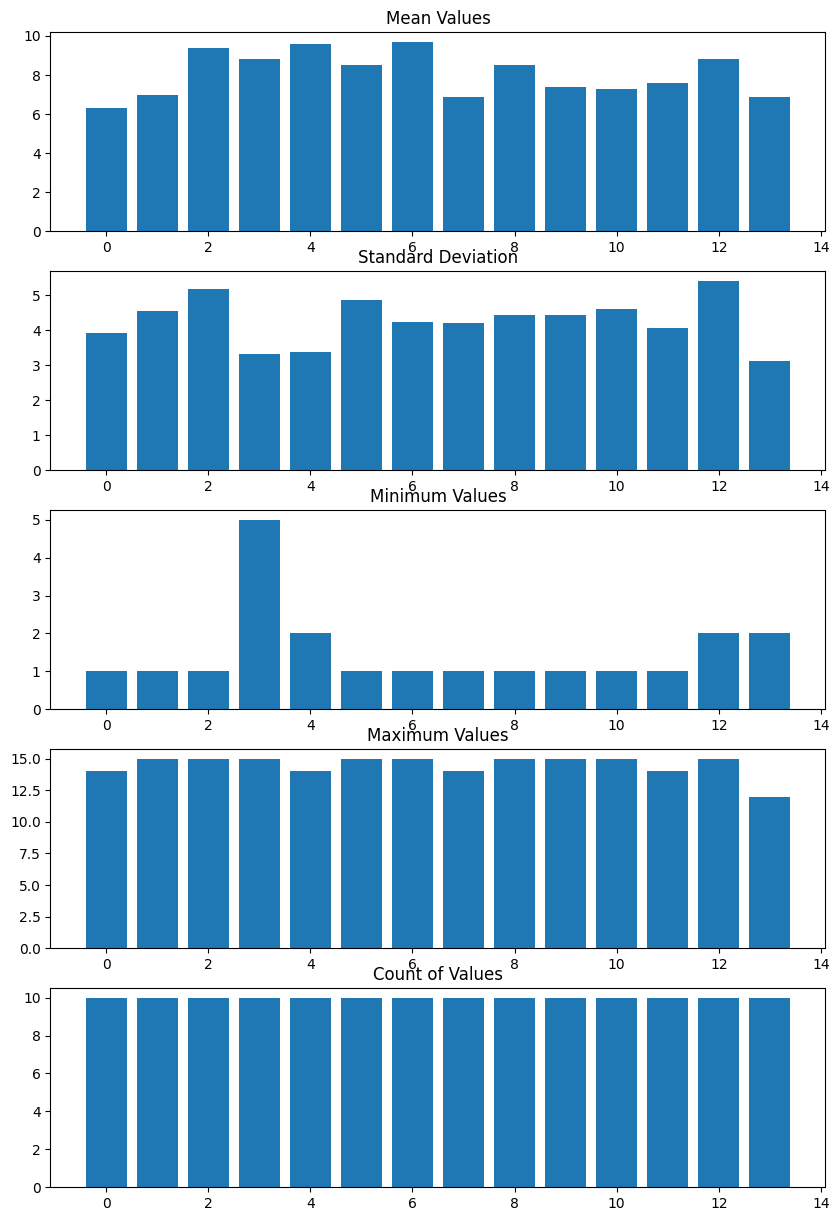

In [24]:
sdf.chat('crete a summary of the data with 5 exec level chart and 5 text observatrions ')